# Intro to scikitlearn

## Split data in random train and test sets

In [249]:
# Create the dataset to split
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
print("X", X)
print("y", y)

X [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
y range(0, 5)


In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train", X_train)
print("X_test", X_test)
print("y_train", y_train)
print("y_test", y_test)

X_train [[8 9]
 [4 5]
 [0 1]
 [6 7]]
X_test [[2 3]]
y_train [4, 2, 0, 3]
y_test [1]


## Stratified sampling

In [2]:
# Using california's housing dataset from the 90s
housing=pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
# Creating a new category called income_cat
# The median income is divided by 1.5 to limit the number of categories
# Greater than 5 were added to 5 to make it representative
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
# To do stratified sampling based on the income category
# The median income is chosen as attribute to stratify as it is believed 
# as a strong indicator of median housing price
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
# To see if worked, first look at the original distribution of the data
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [3]:
# Look the train set distribution
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [4]:
# Look the test set distribution
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

## Linear regression

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
# Load the dataset
url = 'https://raw.githubusercontent.com/ricardopretelt/data-analysis-in-python/master/databases/honeyproduction.csv'
df = pd.read_csv(url)
# To learn about the dataset we are going to analyze.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB
None


In [252]:
# Preview of the dataset
print(df.head())

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


In [253]:
#To print the query with the production grouped by year
prod_per_year=df.groupby('year').totalprod.mean().reset_index()
print(prod_per_year)

    year     totalprod
0   1998  5.105093e+06
1   1999  4.706674e+06
2   2000  5.106000e+06
3   2001  4.221545e+06
4   2002  3.892386e+06
5   2003  4.122091e+06
6   2004  4.456805e+06
7   2005  4.243146e+06
8   2006  3.761902e+06
9   2007  3.600512e+06
10  2008  3.974927e+06
11  2009  3.626700e+06
12  2010  4.382350e+06
13  2011  3.680025e+06
14  2012  3.522675e+06


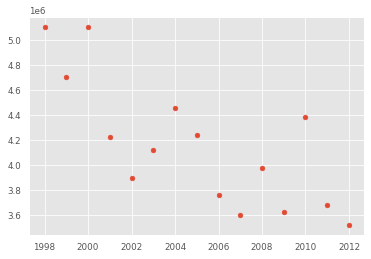

In [254]:
#Saving the years of production in the dataset in a different value X, also the production in Y
X= prod_per_year["year"]
Y=prod_per_year["totalprod"]
#plotting
plt.scatter(X,Y)

In [255]:
#Creating the linear regression model in scikit-learn, and printing the parameters
regr = linear_model.LinearRegression()
#Reshaping X
X = X.values.reshape(-1, 1)
regr.fit(X,Y)
print(regr.coef_[0])
print(regr.intercept_)

-88303.18915238192
181208083.10732976


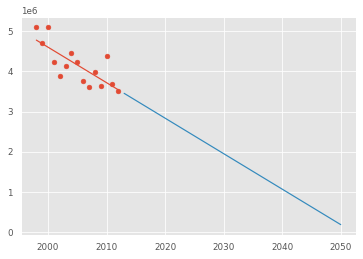

In [256]:
#Creating list that represent the future years until 2051
X_future=np.array(range(2013,2051))
X_future=X_future.reshape(-1,1)
#Predicting the production for the upcoming years and plotting
y_predict=regr.predict(X)
future_predict=regr.predict(X_future)
plt.scatter(X,Y)
plt.plot(X,y_predict)
plt.plot(X_future, future_predict)
plt.show()